In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
# Importing the librarires

from keras.preprocessing.image import img_to_array
from keras.models import load_model
import numpy as np 
import argparse 
import imutils 
import cv2
from tqdm import tqdm_notebook 
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
pip install keras --upgrade 

Requirement already up-to-date: keras in /usr/local/lib/python3.6/dist-packages (2.3.1)


In [0]:
# Path to trained model
model_path = '/content/drive/My Drive/MachineLearning/zoom/vids/weapons3.model'    

In [0]:
# Paths to image samples
images = ['/content/drive/My Drive/MachineLearning/zoom/example/img_578.jpg', '/content/drive/My Drive/MachineLearning/zoom/example/img_590.jpg','/content/drive/My Drive/MachineLearning/zoom/example/img_580.jpg', '/content/drive/My Drive/MachineLearning/zoom/example/img_584.jpg', '/content/drive/My Drive/MachineLearning/zoom/example/business-man-holding-gun-shoot-stock-image__k17753563.jpg', '/content/drive/My Drive/MachineLearning/zoom/example/6188340_stock-photo-young-elegant-man-holding-handgun-isolated-on-white.jpg', '/content/drive/My Drive/MachineLearning/zoom/example/images (1).jpeg', '/content/drive/My Drive/MachineLearning/zoom/example/men-holding-gun-men-holding-gun-weapon-riffle-black-suit-costume-vector-cartoon-123267587.jpg']


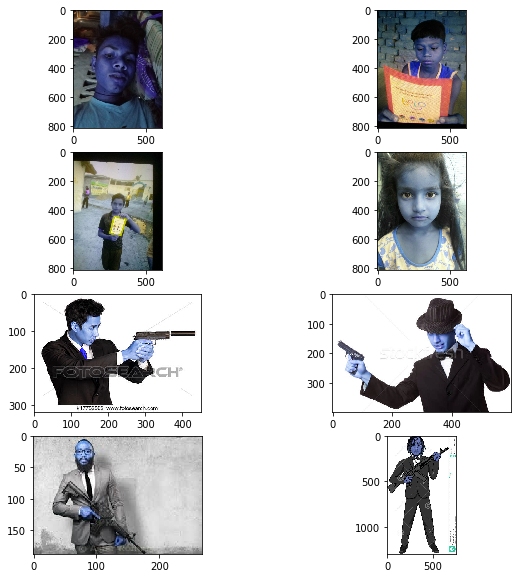

In [5]:
fig = plt.figure(figsize=(10,10))
for i in range(len(images)):
  image = cv2.imread(images[i])
  fig.add_subplot(4,2,i+1)
  plt.imshow(image)
plt.show()

In [6]:
for img in tqdm_notebook(images) : 
  image = cv2.imread(img)     # read image
  orig = image.copy()         # create duplicate
  image = cv2.resize(image, (28,28))
  image = image.astype("float")/255.0
  image = img_to_array(image)    # convert image to array 
  image = np.expand_dims(image, axis=0)

  model = load_model(model_path)      # load trained model

  (ok, notok) = model.predict(image)[0]      # make predictions 

  label = "Explicit" if notok>ok else "Approved"  
  prob = notok if notok>ok else ok 
  res = "{}: {:.2f}%".format(label, prob*100)

  print(res)  

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Approved: 91.53%
Approved: 99.74%
Approved: 69.48%
Explicit: 93.40%
Explicit: 99.93%
Explicit: 99.85%
Explicit: 94.18%
Explicit: 99.80%



In [7]:
!pip install sightengine



In [8]:
from sightengine.client import SightengineClient
for img in images:
  client = SightengineClient('1973501716', 'abuD7HvpLPzoGsGZZBvB')
  output = client.check('wad').set_file(img)
  print(output)

{'status': 'success', 'request': {'id': 'req_6UiQoYJZ8dY6u5oigf5SP', 'timestamp': 1582012836.2943, 'operations': 1}, 'weapon': 0.0065, 'alcohol': 0.002, 'drugs': 0.009, 'media': {'id': 'med_6UiQccdxkLVHWan9krDRE', 'uri': 'img_578.jpg'}}
{'status': 'success', 'request': {'id': 'req_6UiQPPNlnR7ccAW2htzeO', 'timestamp': 1582012838.4615, 'operations': 1}, 'weapon': 0.005, 'alcohol': 0.001, 'drugs': 0, 'media': {'id': 'med_6UiQK9pujDkoW0g0DR7Pl', 'uri': 'img_590.jpg'}}
{'status': 'success', 'request': {'id': 'req_6UiQZC2G1KYlExxIXxIlY', 'timestamp': 1582012842.1315, 'operations': 1}, 'weapon': 0.006, 'alcohol': 0.002, 'drugs': 0.002, 'media': {'id': 'med_6UiQXU0qEQi7PO5pK5bmE', 'uri': 'img_580.jpg'}}
{'status': 'success', 'request': {'id': 'req_6UiQjtwDoGtG8fyqTaYo3', 'timestamp': 1582012844.0239, 'operations': 1}, 'weapon': 0.006, 'alcohol': 0.002, 'drugs': 0.001, 'media': {'id': 'med_6UiQtjG9dSLdHFy43z5rd', 'uri': 'img_584.jpg'}}
{'status': 'success', 'request': {'id': 'req_6UiQXPvjCzGbkY